# Salary Prediction Data Analysis

## Import Libraries

In [166]:
#import neccesary libraries
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns


## Feature Explanation

* `index` : This is just an index column, used to identify each row in the DataFrame.

* `title` : The title of the job.

* `company_name` : The name of the company offering the job.
* `location` : The location where the job is based.
* `via` : How the job listing was accessed or found.

* `extensions`: a list of extra information about the job.

* `job_id`: This is the unique identifier for the job listing.

* `thumbnail`: This column may contain a URL to a thumbnail image for the job listing.

* `posted_at`: The time when the job was posted.

* `schedule_type`: The type of schedule for the job, such as full-time, part-time, contractor etc.

* `search_location`: The location where the job was searched.

* `commute_time`: The commute time to the job location.

* `salary_rate`: The rate at which the salary is given, like per hour, per year, etc.

* `salary_avg`: The average salary for the job.

* `salary_min`: The minimum salary for the job.

* `salary_max`: The maximum salary for the job.

* `salary_hourly`: The hourly rate for the job. This could be NaN if the job is not paid hourly.

* `salary_yearly`: The yearly salary for the job. This could be NaN if the job is not paid yearly.

* `salary_standardized`: The standardized salary, which is calculated based on the rate, average, min, max etc.

* `description_tokens`: A list of key terms or tokens that were probably extracted from the job description.

## Load Data

In [167]:
q = (
    pl.scan_csv("df_cleaned.csv")
    
)

df_polars = q.collect()
df_polars.head

<bound method DataFrame.head of shape: (4_320, 23)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ index ┆ title      ┆ company_na ┆ location   ┆ … ┆ salary_ho ┆ salary_ye ┆ salary_st ┆ descripti │
│ ---   ┆ ---        ┆ me         ┆ ---        ┆   ┆ urly      ┆ arly      ┆ andardize ┆ on_tokens │
│ i64   ┆ str        ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ d         ┆ ---       │
│       ┆            ┆ str        ┆            ┆   ┆ f64       ┆ f64       ┆ ---       ┆ str       │
│       ┆            ┆            ┆            ┆   ┆           ┆           ┆ f64       ┆           │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 6     ┆ Experience ┆ Upwork     ┆  Anywhere  ┆ … ┆ 56.0      ┆ null      ┆ 116480.0  ┆ ['excel', │
│       ┆ d Data     ┆            ┆            ┆   ┆           ┆           ┆           ┆ 'sql']    │
│       ┆ Analyst    ┆            ┆     

In [168]:
df_pandas = pd.read_csv("df_cleaned.csv")

df_pandas.head()

,index,title,company_name,location,via,extensions,job_id,thumbnail,posted_at,schedule_type,...,search_location,commute_time,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,6,Experienced Data Analyst Required: Dynamic Dat...,Upwork,Anywhere,via Upwork,"['10 hours ago', '37‚Äì75 an hour', 'Work from...",eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,NaN,10 hours ago,Contractor,...,United States,NaN,an hour,56.0,37.0,75.0,56.0,NaN,116480.0,"['excel', 'sql']"
1,13,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"['24 hours ago', '65K‚Äì75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,Full-time,...,United States,NaN,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
2,23,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"['24 hours ago', '65K‚Äì75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,Full-time,...,United States,NaN,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
3,33,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"['24 hours ago', '65K‚Äì75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,Full-time,...,United States,NaN,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
4,43,Data Analyst,Insight Global,Anywhere,via LinkedIn,"['15 hours ago', '40‚Äì45 an hour', 'Work from...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,...,United States,NaN,an hour,42.5,40.0,45.0,42.5,NaN,88400.0,['sql']


## Data Cleaning

### Handling missing values

In [169]:
missing_values = {col: df_polars[col].is_null().sum() for col in df_polars.columns}
missing_values

{'index': 0,
 'title': 0,
 'company_name': 0,
 'location': 3,
 'via': 0,
 'extensions': 0,
 'job_id': 0,
 'thumbnail': 3172,
 'posted_at': 0,
 'schedule_type': 3,
 'work_from_home': 1279,
 'search_term': 0,
 'date_time': 0,
 'search_location': 0,
 'commute_time': 4320,
 'salary_rate': 0,
 'salary_avg': 0,
 'salary_min': 0,
 'salary_max': 0,
 'salary_hourly': 1698,
 'salary_yearly': 2629,
 'salary_standardized': 0,
 'description_tokens': 0}

Get rid of unecessary columns like `thumbnail` and `commute_time` since it has mostly the missing values

In [170]:
# Drop unecessary columns
df_pandas = df_pandas.drop(columns=['thumbnail', 'commute_time'])

In [171]:
# Fill the na in `work_from_home` column with 0
df_pandas['work_from_home'].fillna(0, inplace=True)

In [172]:
# Fill the na in `salary_hourly` column with hour wage calculated from `salary_standardized`

# Define a function to convert yearly wage to hourly wage based on job type
def calculate_hourly(row):
    yearly_wage = row['salary_standardized']
    if pd.isna(yearly_wage):
        return np.nan
    
    if row['schedule_type'] == 'Full-time':
        return yearly_wage / 2080
    elif row['schedule_type'] == 'Part-time':
        return yearly_wage / 1040
    else: # for 'Contractor' or any other types
        return yearly_wage / 2080 # or any other reasonable assumption for the number of hours

# Apply this function to fill na in 'salary_hourly'
df_pandas['salary_hourly'] = df_pandas.apply(lambda row: calculate_hourly(row) if pd.isna(row['salary_hourly']) else row['salary_hourly'], axis=1)


In [173]:
# fill the na in `salary_yearly` with the values from `salary_standardized`
df_pandas['salary_yearly'].fillna(df_pandas['salary_standardized'], inplace=True)

In [174]:
missing = df_pandas.isna().sum()
missing

index                  0
title                  0
company_name           0
location               3
via                    0
extensions             0
job_id                 0
posted_at              0
schedule_type          3
work_from_home         0
search_term            0
date_time              0
search_location        0
salary_rate            0
salary_avg             0
salary_min             0
salary_max             0
salary_hourly          0
salary_yearly          0
salary_standardized    0
description_tokens     0
dtype: int64

### Handling duplicated values

In [175]:
num_duplicates = df_pandas.duplicated(subset=['title', 'company_name', 'salary_standardized']).sum()
print(f'There are {num_duplicates} duplicate rows in the DataFrame based on title,company name, and salary_standardized.')


There are 1140 duplicate rows in the DataFrame based on title,company name, and salary_standardized.


In [176]:
df_pandas.drop_duplicates(subset=['title', 'company_name', 'salary_standardized'], inplace=True)

In [177]:
df_polars = pl.from_pandas(df_pandas)

In [178]:
df_polars.shape

(3180, 21)

In [179]:
df_pandas.shape

(3180, 21)

In [180]:
df_pandas.info

<bound method DataFrame.info of       index                                              title  \
0         6  Experienced Data Analyst Required: Dynamic Dat...   
1        13                                Master Data Analyst   
4        43                                       Data Analyst   
5        46  Data analyst who can help with 100% correct tr...   
6        48                                       Data Analyst   
...     ...                                                ...   
4262   1306   Senior Data Analyst, Management Data Analysis OE   
4275   1347             Data Analyst (TC-AIMS II, POE LIS EIS)   
4299   1448              Digital Web Analyst (Adobe Analytics)   
4302   1462                              Data Engineer/Analyst   
4305   1465                   Senior Data Analyst (ServiceNow)   

                         company_name              location  \
0                              Upwork             Anywhere    
1          Charles River Laboratories      United

### Checking the number of unique values

In [181]:
# Checking the number of unique values in each column

dict = {}
for col in df_pandas.columns:
    dict[col] = df_pandas[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
index,2161
title,2402
company_name,910
location,84
via,72
extensions,2682
job_id,3180
posted_at,40
schedule_type,4
work_from_home,2


In [182]:
df_pandas.describe()


,index,work_from_home,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,1404.233333,0.824528,30051.187454,25493.981333,34608.393575,45.918036,95437.880431,95437.880431
std,831.315771,0.380430,50087.197624,42711.488176,58025.786671,21.822329,45337.478258,45337.478258
min,0.000000,0.000000,9.000000,8.000000,10.000000,9.000000,18720.000000,18720.000000
25%,735.000000,1.000000,31.000000,18.000000,45.000000,30.500000,63440.000000,63440.000000
50%,1372.500000,1.000000,56.500000,40.000000,75.000000,43.269231,90000.000000,90000.000000
75%,1940.250000,1.000000,70000.000000,60000.000000,80000.000000,57.500000,119600.000000,119600.000000
max,3733.000000,1.000000,233500.000000,215000.000000,283000.000000,300.000000,624000.000000,624000.000000


### Checking the visualization

In [183]:
# Making sure the 'description_tokens' column is list
df_pandas['description_tokens'] = df_pandas['description_tokens'].apply(lambda x: ast.literal_eval(str(x)))

# Breaking the list down into individual elements
df_exploded = df_pandas.explode('description_tokens')

# Counting the frequency of each skill
skills_counts = df_exploded['description_tokens'].value_counts()

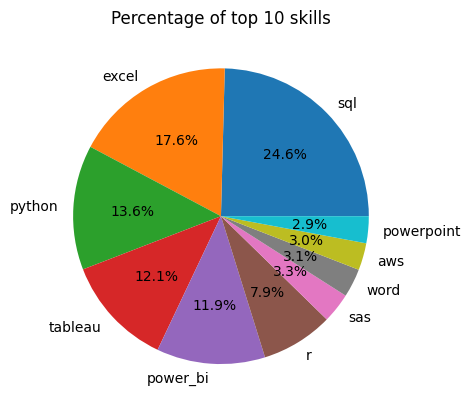

In [184]:
N = 10  #top 10 skills
top_skills = skills_counts[:N]
top_skills.plot(kind='pie', autopct='%1.1f%%')
plt.title(f"Percentage of top {N} skills")
plt.ylabel("")
plt.show()

Based on my observation, the most significant skills for data analyst would be SQL, Excel, Python

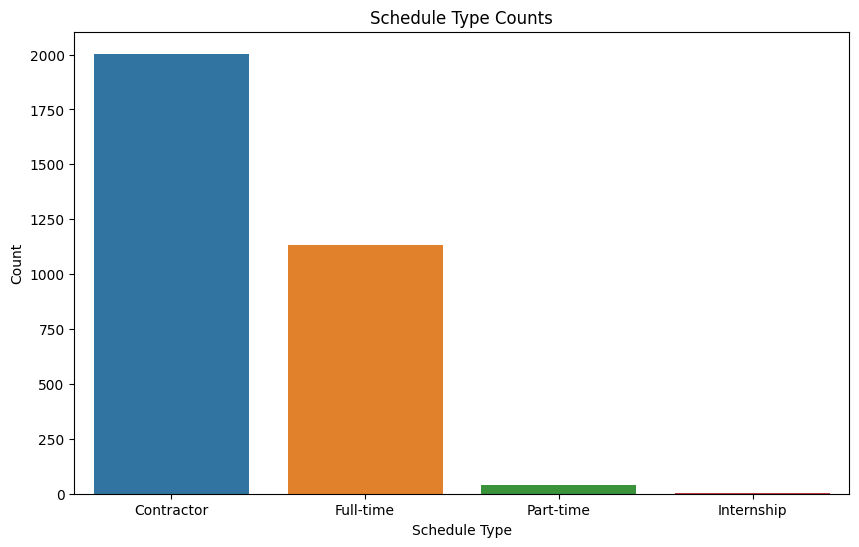

In [185]:
# Count the frequency of each schedule_type
schedule_counts = df_pandas['schedule_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=schedule_counts.index, y=schedule_counts.values)

plt.title('Schedule Type Counts')
plt.ylabel('Count')
plt.xlabel('Schedule Type')

plt.show()

There appears to be more contractors for data analyst than for full-time, part-time. internships are most rare in this, perhaps because the time I collect the data has passed the season for internhsip recruitment

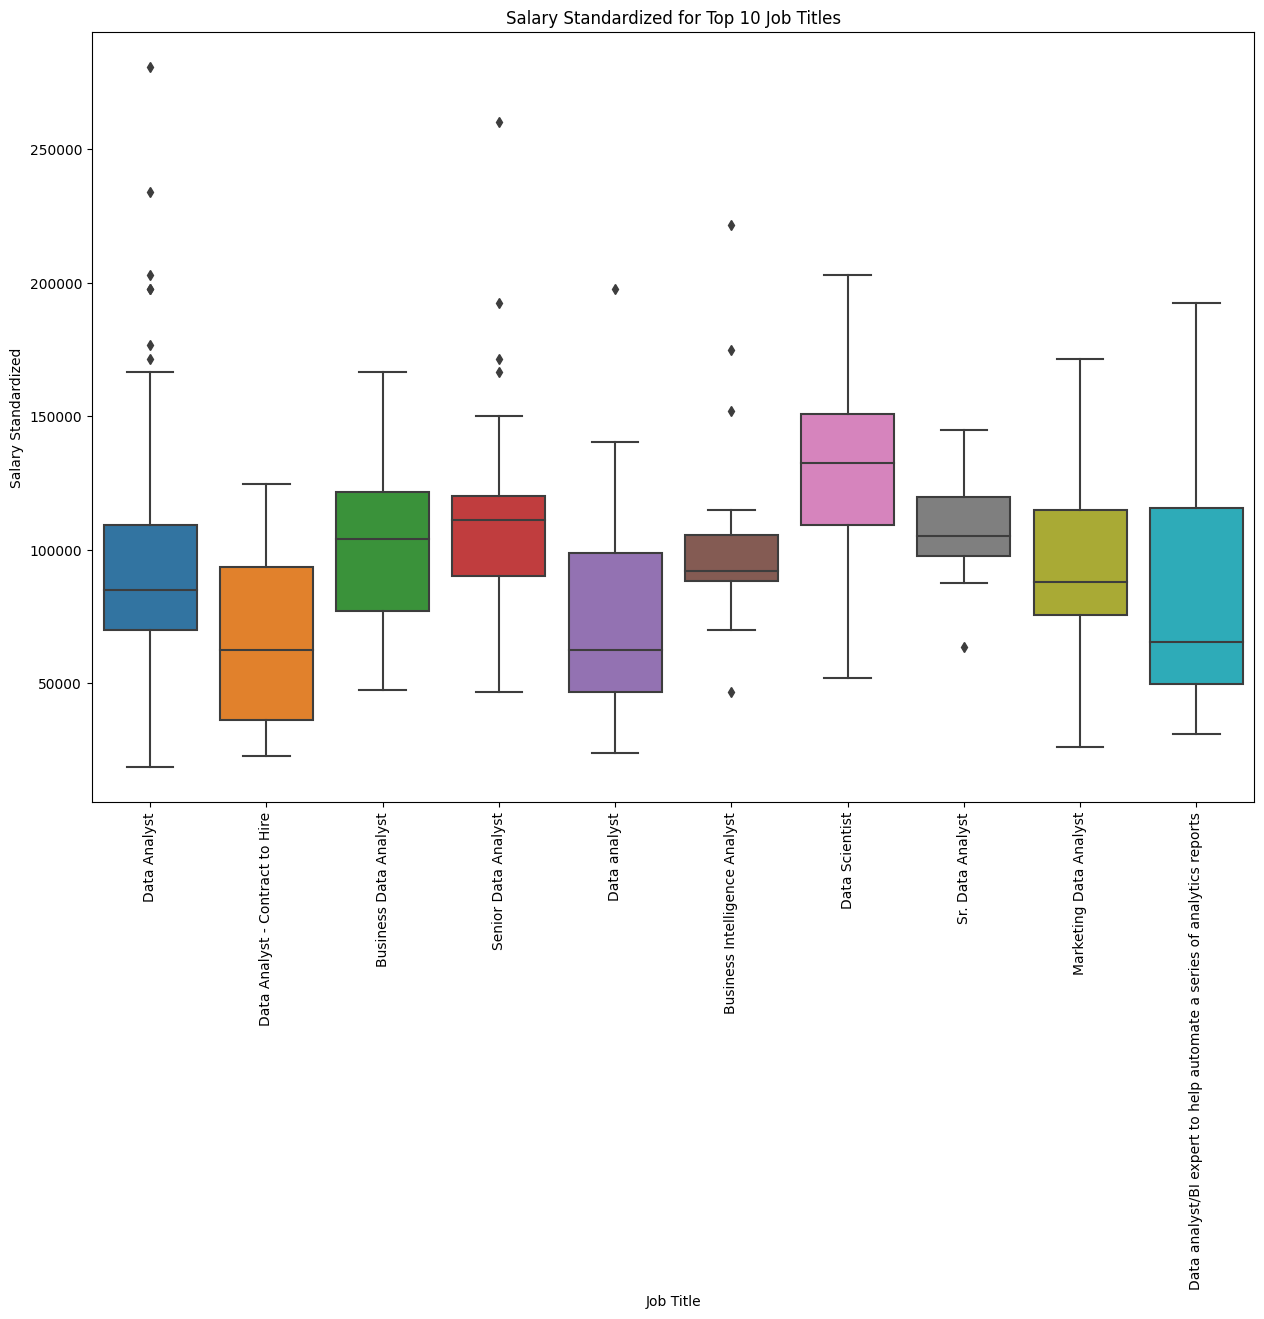

In [186]:
# Considering top 10 jobs with most postings
top_jobs = df_pandas['title'].value_counts().index[:10]
df_top_jobs = df_pandas[df_pandas['title'].isin(top_jobs)]

# Create a box plot
plt.figure(figsize=(15,10))
sns.boxplot(data = df_top_jobs, x='title', y='salary_standardized')

plt.title('Salary Standardized for Top 10 Job Titles')
plt.ylabel('Salary Standardized')
plt.xlabel('Job Title')
plt.xticks(rotation=90)  # Make the x-axis labels easier to read

plt.show()

While these top 10 job roles tend to hover around the $100k per year mark, roles in data science command higher salaries. However, this does not necessarily indicate a trend as the number of data analyst roles in the dataset significantly outnumbers other titles. It's important to consider this when drawing conclusions from the data.

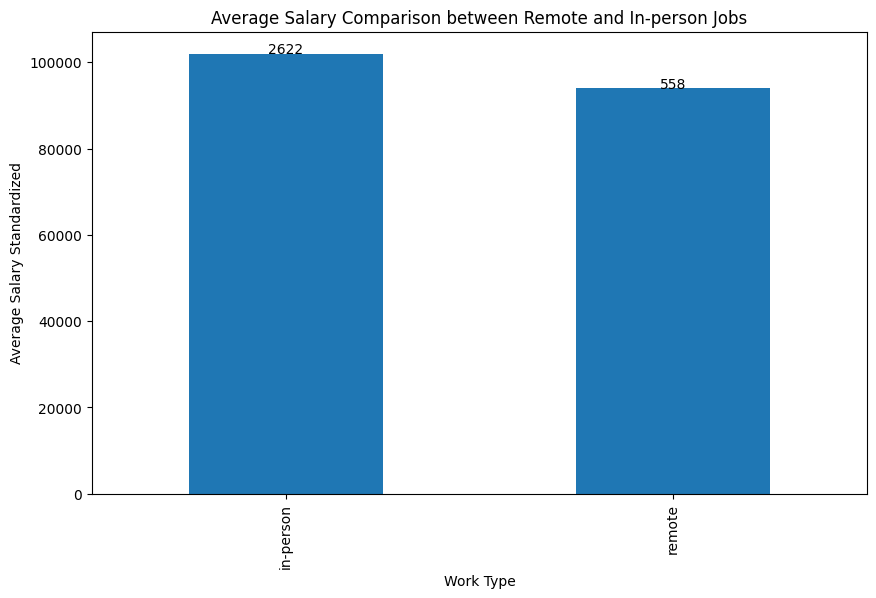

In [187]:
# Define 'work_type' based on 'location'
df_pandas['work_type'] = df_pandas['work_from_home'].apply(lambda x: 'remote' if x == 1 else 'in-person')

# Calculate mean salary for each work type
mean_salaries = df_pandas.groupby('work_type')['salary_standardized'].mean()

# Calculate the counts of each work type
counts = df_pandas['work_type'].value_counts()

# Plot the results
ax = mean_salaries.plot(kind='bar', figsize=(10, 6), title='Average Salary Comparison between Remote and In-person Jobs')

# Add the counts on top of the bars
for i, v in enumerate(mean_salaries):
    ax.text(i, v + 0.01, counts[i], ha='center')

plt.ylabel('Average Salary Standardized')
plt.xlabel('Work Type')
plt.show()


There are slightly more in-person roles than the remote roles, and the average pay standardized is slightly higher

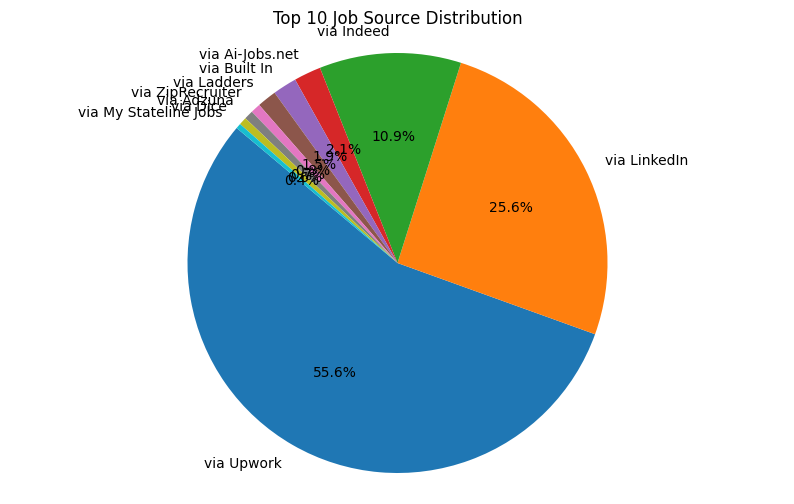

In [188]:
# Count the frequency of each source
source_counts = df_pandas['via'].value_counts()

N = 10  # top 10 sources 
top_source = source_counts[:N]
# Plot the results
plt.figure(figsize=(10,6))
plt.pie(top_source, labels=top_source.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {N} Job Source Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Upwork, LinkedIn, and Indeed dominate the highest source distribution

### Additional Checking

In [189]:
df_pandas.dtypes

index                    int64
title                   object
company_name            object
location                object
via                     object
extensions              object
job_id                  object
posted_at               object
schedule_type           object
work_from_home         float64
search_term             object
date_time               object
search_location         object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
work_type               object
dtype: object

In [190]:
# Separate columns into numerical and categorical
all_columns = df_pandas.columns.to_list()
numerical = ['salary_avg','salary_min','salary_max', 'salary_hourly','salary_yearly', 'salary_standardized']
categorical = list(set(all_columns) - set(numerical))

# check for odd values in categorical columns, such as string "-", or other
for i in df_pandas[categorical].columns:
    x = df_pandas[categorical][i].value_counts()
    print(i)
    print(x,'\n')

location
location
Anywhere                1648
 Anywhere                974
United States            235
  United States          132
  Kansas City, MO         12
                        ... 
Rolla, MO                  1
Shawnee Mission, KS        1
St Elizabeth, MO           1
Warrensburg, MO            1
Vienna, MO                 1
Name: count, Length: 84, dtype: int64 

salary_rate
salary_rate
an hour    2244
a year      930
a month       6
Name: count, dtype: int64 

title
title
Data Analyst                                                     304
Senior Data Analyst                                               59
Business Data Analyst                                             37
Data Scientist                                                    33
Sr. Data Analyst                                                  21
                                                                ... 
Amazon ECommerce Data Analyst                                      1
Business Analyst - Enterpris

Observations:

1. Successfully dropped the unnecessary columns `thumbnail` and `commute_time`
2. Dataframe almost has no missing values
3. originally have 1140 duplicated values not have none

## Eploratory Data Analysis

### Statistical Summary of Columns

In [191]:
df_pandas[numerical]

,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
0,56.0,37.0,75.0,56.000000,116480.0,116480.0
1,70000.0,65000.0,75000.0,33.653846,70000.0,70000.0
4,42.5,40.0,45.0,42.500000,88400.0,88400.0
5,35.0,20.0,50.0,35.000000,72800.0,72800.0
6,33.0,32.0,34.0,33.000000,68640.0,68640.0
...,...,...,...,...,...,...
4262,78500.0,72000.0,85000.0,37.740385,78500.0,78500.0
4275,75000.0,60000.0,90000.0,36.057692,75000.0,75000.0
4299,55.0,45.0,65.0,55.000000,114400.0,114400.0
4302,125000.0,100000.0,150000.0,60.096154,125000.0,125000.0


In [192]:
df_pandas[numerical].describe()

,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,30051.187454,25493.981333,34608.393575,45.918036,95437.880431,95437.880431
std,50087.197624,42711.488176,58025.786671,21.822329,45337.478258,45337.478258
min,9.000000,8.000000,10.000000,9.000000,18720.000000,18720.000000
25%,31.000000,18.000000,45.000000,30.500000,63440.000000,63440.000000
50%,56.500000,40.000000,75.000000,43.269231,90000.000000,90000.000000
75%,70000.000000,60000.000000,80000.000000,57.500000,119600.000000,119600.000000
max,233500.000000,215000.000000,283000.000000,300.000000,624000.000000,624000.000000


In [193]:
df_pandas[categorical]

,location,salary_rate,title,job_id,index,company_name,search_term,work_from_home,posted_at,via,description_tokens,schedule_type,search_location,work_type,date_time,extensions
0,Anywhere,an hour,Experienced Data Analyst Required: Dynamic Dat...,eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,6,Upwork,data analyst,1.0,10 hours ago,via Upwork,"[excel, sql]",Contractor,United States,remote,00:31.0,"['10 hours ago', '37‚Äì75 an hour', 'Work from..."
1,United States,a year,Master Data Analyst,eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,13,Charles River Laboratories,data analyst,0.0,24 hours ago,via Indeed,"[sap, excel, word, powerpoint]",Full-time,United States,in-person,20:03.5,"['24 hours ago', '65K‚Äì75K a year', 'Full-time']"
4,Anywhere,an hour,Data Analyst,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,43,Insight Global,data analyst,1.0,15 hours ago,via LinkedIn,[sql],Full-time,United States,remote,00:08.6,"['15 hours ago', '40‚Äì45 an hour', 'Work from..."
5,Anywhere,an hour,Data analyst who can help with 100% correct tr...,eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3Qgd2hvIGNhbi...,46,Upwork,data analyst,1.0,19 hours ago,via Upwork,[],Contractor,United States,remote,00:08.6,"['19 hours ago', '20‚Äì50 an hour', 'Work from..."
6,"Eastborough, KS",an hour,Data Analyst,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,48,Global Network Technologies,data analyst,0.0,19 hours ago,via Adzuna,[tableau],Full-time,United States,in-person,00:08.6,"['19 hours ago', '32‚Äì34 an hour', 'Full-time']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,United States,a year,"Senior Data Analyst, Management Data Analysis OE",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0LC...,1306,NATIONAL GRID CO USA (NE POWER),data analyst,0.0,5 hours ago,via My ArkLaMiss Jobs,"[sap, tableau, power_bi, excel, snowflake]",Full-time,United States,in-person,00:11.7,"['5 hours ago', '72K‚Äì85K a year', 'Full-time..."
4275,United States,a year,"Data Analyst (TC-AIMS II, POE LIS EIS)",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKFRDLUFJTV...,1347,Fortuna BMC,data analyst,0.0,9 hours ago,via My ArkLaMiss Jobs,[],Full-time,United States,in-person,00:12.8,"['9 hours ago', '60K‚Äì90K a year', 'Full-time..."
4299,United States,an hour,Digital Web Analyst (Adobe Analytics),eyJqb2JfdGl0bGUiOiJEaWdpdGFsIFdlYiBBbmFseXN0IC...,1448,Harnham,data analyst,0.0,16 hours ago,via My ArkLaMiss Jobs,"[tableau, power_bi, sql]",Full-time,United States,in-person,00:18.0,"['16 hours ago', '45‚Äì65 an hour', 'Full-time']"
4302,United States,a year,Data Engineer/Analyst,eyJqb2JfdGl0bGUiOiJEYXRhIEVuZ2luZWVyL0FuYWx5c3...,1462,Techveda Inc,data analyst,0.0,17 hours ago,via My ArkLaMiss Jobs,"[python, redshift, aws, sql, pandas, scala, sp...",Full-time,United States,in-person,40:15.6,"['17 hours ago', '100K‚Äì150K a year', 'Full-t..."


In [194]:
df_pandas[categorical].describe(include='all')

,location,salary_rate,title,job_id,index,company_name,search_term,work_from_home,posted_at,via,description_tokens,schedule_type,search_location,work_type,date_time,extensions
count,3177,3180,3180,3180,3180.000000,3180,3180,3180.000000,3180,3180,3180,3178,3180,3180,3180,3180
unique,84,3,2402,3180,NaN,910,1,NaN,40,72,1049,4,1,2,559,2682
top,Anywhere,an hour,Data Analyst,eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,NaN,Upwork,data analyst,NaN,11 hours ago,via Upwork,[],Contractor,United States,remote,00:18.2,"['12 hours ago', '15‚Äì45 an hour', 'Work from..."
freq,1648,2244,304,1,NaN,1682,3180,NaN,282,1682,1072,2004,3180,2622,23,11
mean,NaN,NaN,NaN,NaN,1404.233333,NaN,NaN,0.824528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,831.315771,NaN,NaN,0.380430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,735.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1372.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1940.250000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the numerical part of the dataframe, someone can be paid $9 per hour to can be paid $300 per hour. The max for someone to be paid is 600k+ 

For the categorical part of the dataframe, since they are all object, so the pandas cannot do min-max the same way it does to the numerical values

### Univariate Analysis

/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_8819/4129779364.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_8819/4129779364.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_8819/4129779364.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_8819/4129779364.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_8819/4129779364.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


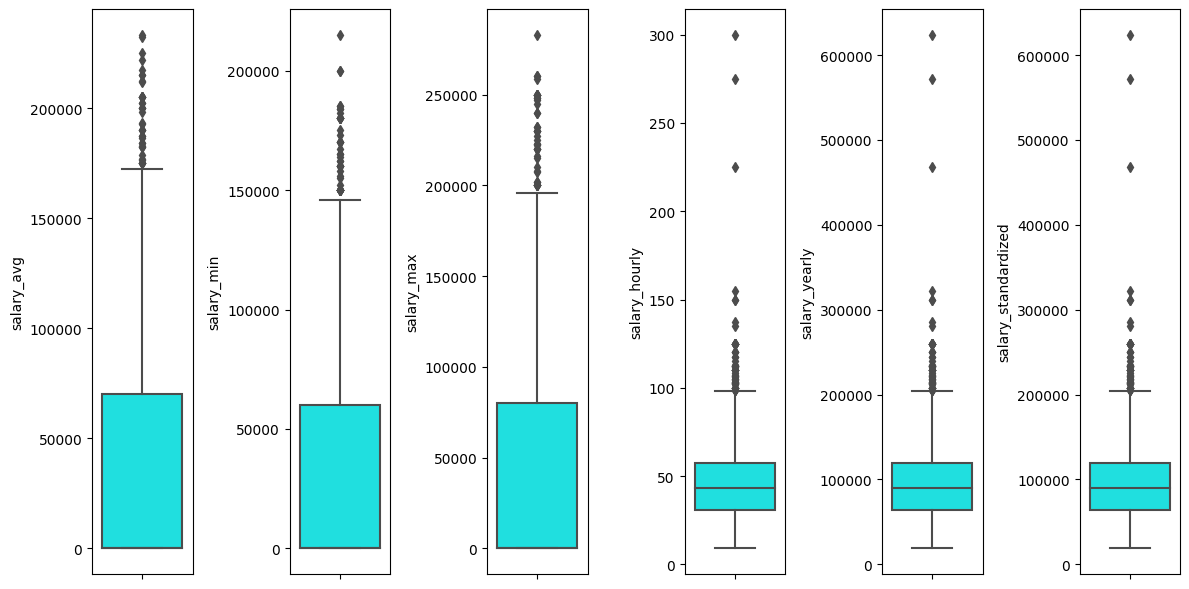

In [195]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_pandas[features[i]], color='cyan')
    plt.tight_layout()

There are outliers for both, `salary_avg`, `salary_min`, `salary_max`, `salary_hourly`, `salary_yearly`, `salary_standardized`

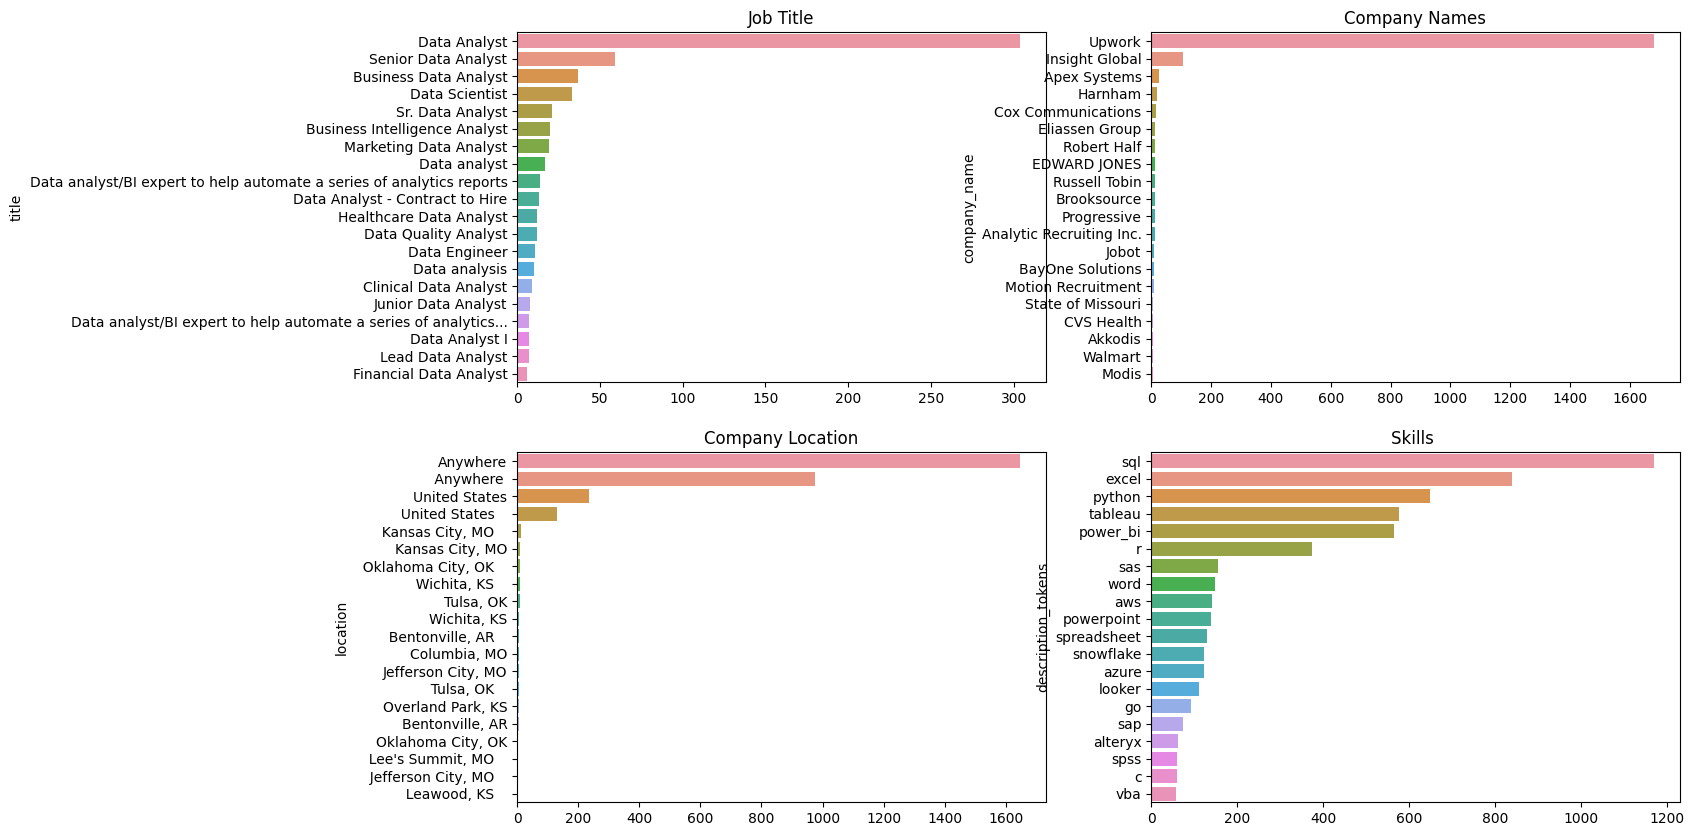

In [196]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df_pandas["title"].value_counts().sort_values(ascending = False).head(20), 
            y = df_pandas["title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df_pandas["company_name"].value_counts().sort_values(ascending = False).head(20), 
            y = df_pandas["company_name"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Company Names")
axes[0][1].set_xlabel("")

sns.barplot(x = df_pandas["location"].value_counts().sort_values(ascending = False).head(20), 
            y = df_pandas["location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df_exploded["description_tokens"].value_counts().sort_values(ascending = False).head(20), 
            y = df_exploded["description_tokens"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Skills ")
axes[1][1].set_xlabel("");

### Multivariate Analysis

#### Analyst 1: what is the highest paying salary?

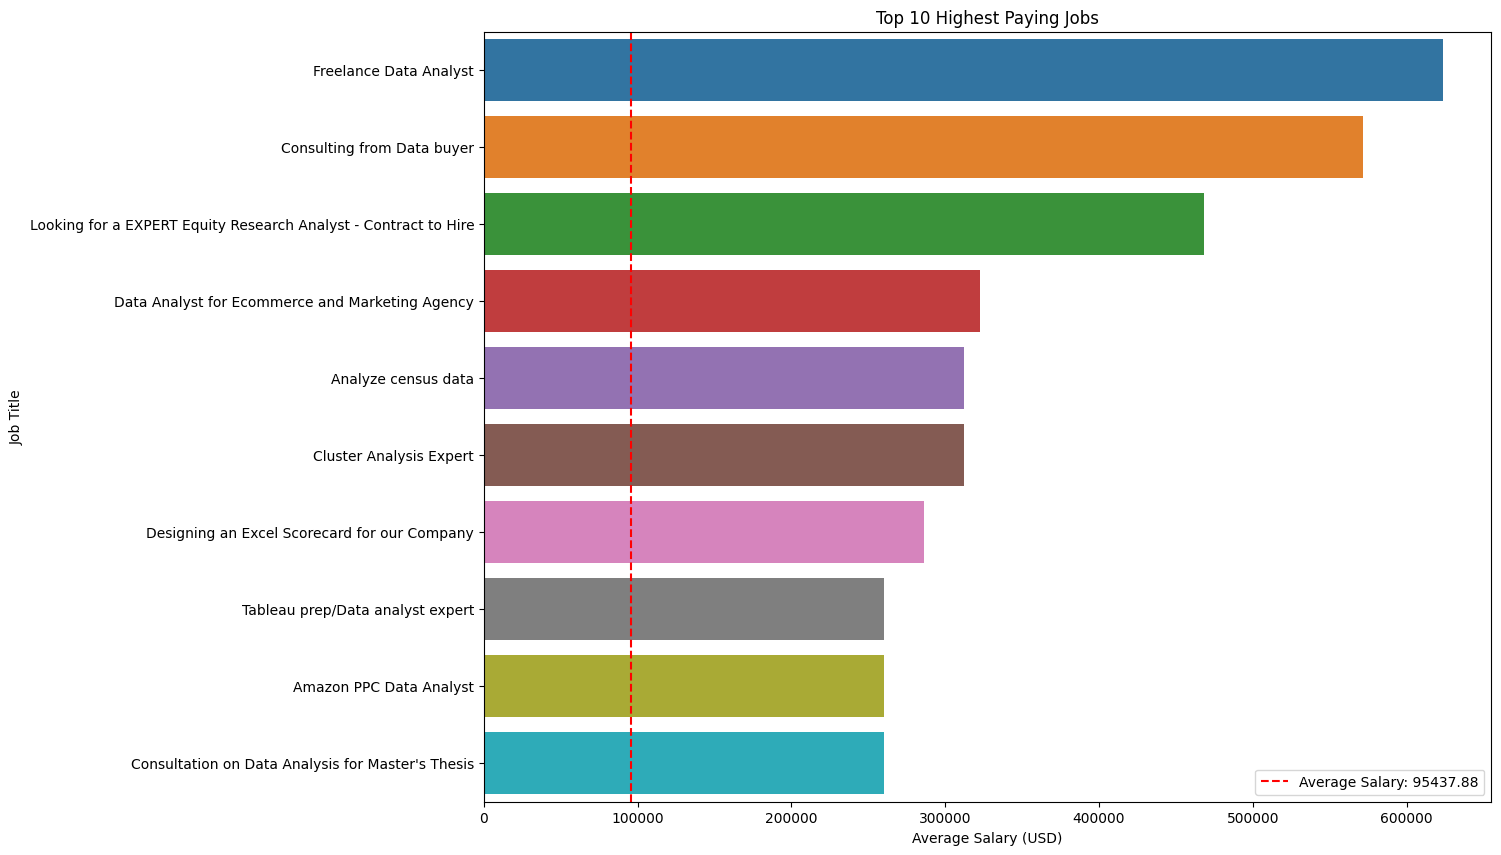

In [197]:
# create a new dataframe to manipulate without affecting the original dataframe
df_pandas_copy = df_pandas.copy()

# replace '$' character with '\$' 
df_pandas_copy["title"] = df_pandas_copy["title"].str.replace("$", "\$", regex=False)

# Group by title and calculate the mean salary for each title
average_salaries = df_pandas_copy.groupby('title')['salary_standardized'].mean().sort_values(ascending=False)

# Select top 10
top_10_salaries = average_salaries.head(10)

# Calculate the mean salary for all job titles
mean_salary_all = df_pandas_copy['salary_standardized'].mean()

# Plot
fig, ax = plt.subplots(figsize=(13,10))

sns.barplot(ax=ax, x=top_10_salaries.values, y=top_10_salaries.index, orient='h')

# Plot the average salary line
ax.axvline(x=mean_salary_all, color='r', linestyle='--', label=f'Average Salary: {mean_salary_all:.2f}')

ax.set_xlabel('Average Salary (USD)')
ax.set_ylabel('Job Title')
ax.set_title('Top 10 Highest Paying Jobs')
ax.legend()

plt.show()


In [198]:
top_salary = ['salary_standardized', 'title']
df_pandas[top_salary].max()

salary_standardized                                             624000.0
title                  üîé Google Analytics & GTM Expert - Contract ...
dtype: object

In [199]:
df_pandas[top_salary].min()

salary_standardized                     18720.0
title                  (Remote) Data Specialist
dtype: object

Observation:
* from the chart, I can see that the highest salary by **Freelance Data Analyst** is over $600k and the lowest salary by **(Remote) Data Specialist** is below $19k
* The avaerage salary for the data analyst role is about $90k a year!

#### Analysis 2: Top 10 Data Related Jobs in July 27th, 2023

In [200]:
df_pandas.groupby(['posted_at']).agg(
    job_title = ('title','count')
).reset_index()

,posted_at,job_title
0,1 hour ago,20
1,10 hours ago,222
2,11 hours ago,282
3,12 hours ago,281
4,13 hours ago,219
5,14 hours ago,177
6,15 hours ago,132
7,15 minutes ago,3
8,16 hours ago,101
9,17 hours ago,91


In [201]:
df_pandas['salary_standardized'].value_counts()

salary_standardized
119600.0    159
62400.0     137
67600.0      77
124800.0     75
63440.0      73
           ... 
181812.8      1
185120.0      1
115500.0      1
138516.0      1
105815.0      1
Name: count, Length: 499, dtype: int64

In [202]:
df_pandas['title'].value_counts().head(10)

title
Data Analyst                                                             304
Senior Data Analyst                                                       59
Business Data Analyst                                                     37
Data Scientist                                                            33
Sr. Data Analyst                                                          21
Business Intelligence Analyst                                             20
Marketing Data Analyst                                                    19
Data analyst                                                              17
Data analyst/BI expert to help automate a series of analytics reports     14
Data Analyst - Contract to Hire                                           13
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Related Jobs in July 27th, 2023')

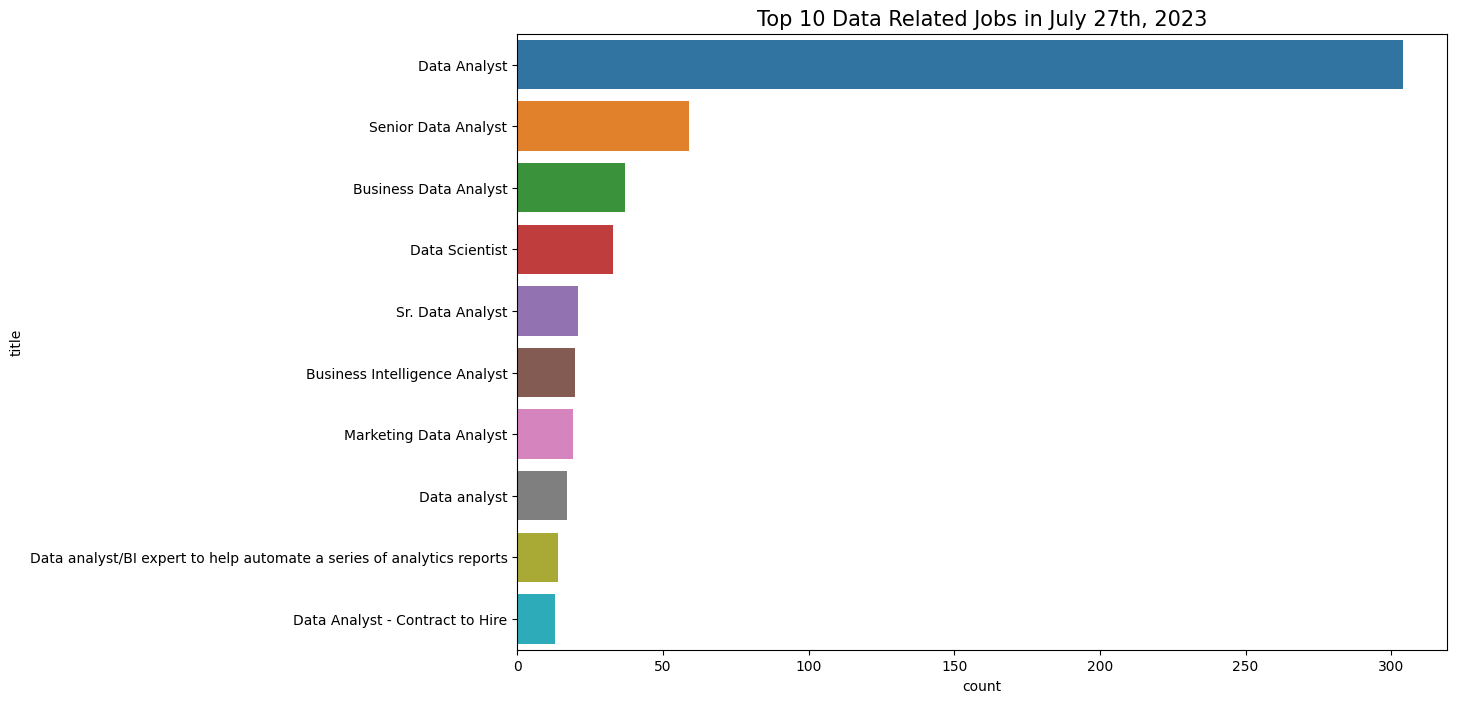

In [203]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df_pandas["title"].value_counts().sort_values(ascending = False).head(10), 
            y = df_pandas["title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Related Jobs in July 27th, 2023', fontsize = 15)

Observation:
* In July, 2023, the top 10 popular data related jobs are shown on the chart and the most popular is **Data Analyst**
* **Data Analyst**, **Senior Data Analyst**, and **Business Data Analyst** are the top 3 most popular jobs based on the dataset

#### Analysis 3: How is the distribution of Data Analyst worker salaries?

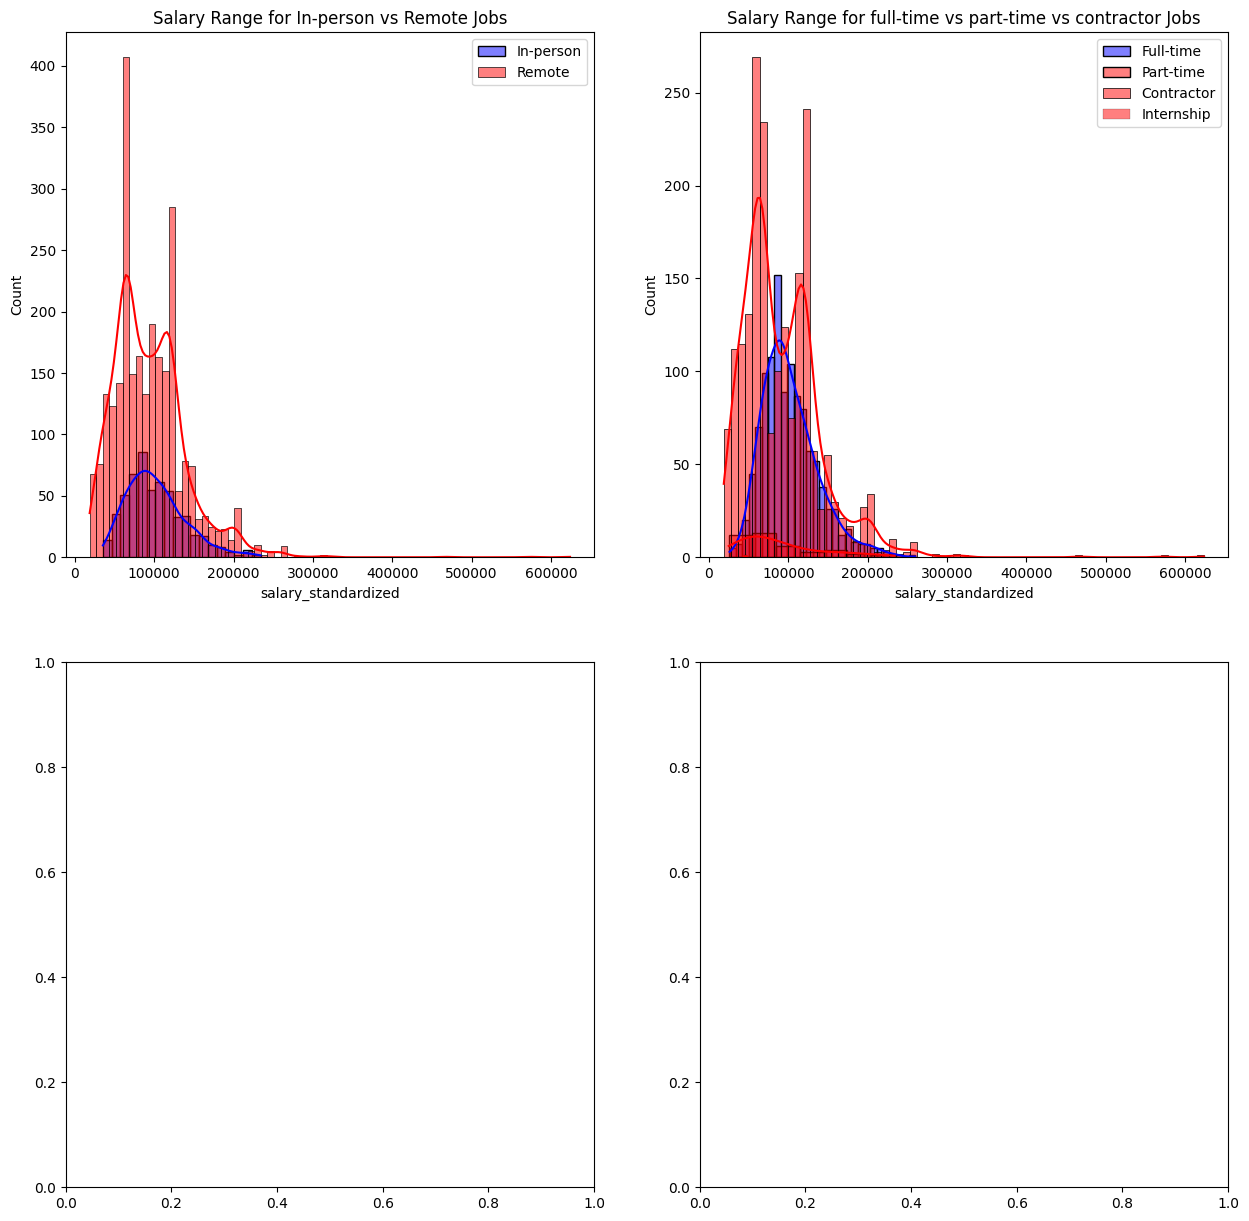

In [204]:
fig, axes = plt.subplots(2, 2, figsize = (15, 15))

sns.histplot(df_pandas.query("work_from_home == 0")["salary_standardized"], kde = True, color = "blue", ax = axes[0][0], label="In-person")
sns.histplot(df_pandas.query("work_from_home == 1")["salary_standardized"], kde = True, color = "red", ax = axes[0][0], label="Remote")
axes[0][0].legend()
axes[0][0].set_title("Salary Range for In-person vs Remote Jobs")


sns.histplot(df_pandas.query("schedule_type == 'Full-time'")["salary_standardized"], kde = True, color = "blue", ax = axes[0][1], label="Full-time")
sns.histplot(df_pandas.query("schedule_type == 'Part-time'")["salary_standardized"], kde = True, color = "red", ax = axes[0][1], label="Part-time")
sns.histplot(df_pandas.query("schedule_type == 'Contractor'")["salary_standardized"], kde = True, color = "red", ax = axes[0][1], label="Contractor")
sns.histplot(df_pandas.query("schedule_type == 'Internship'")["salary_standardized"], kde = True, color = "red", ax = axes[0][1], label="Internship")

axes[0][1].legend()
axes[0][1].set_title("Salary Range for full-time vs part-time vs contractor Jobs")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


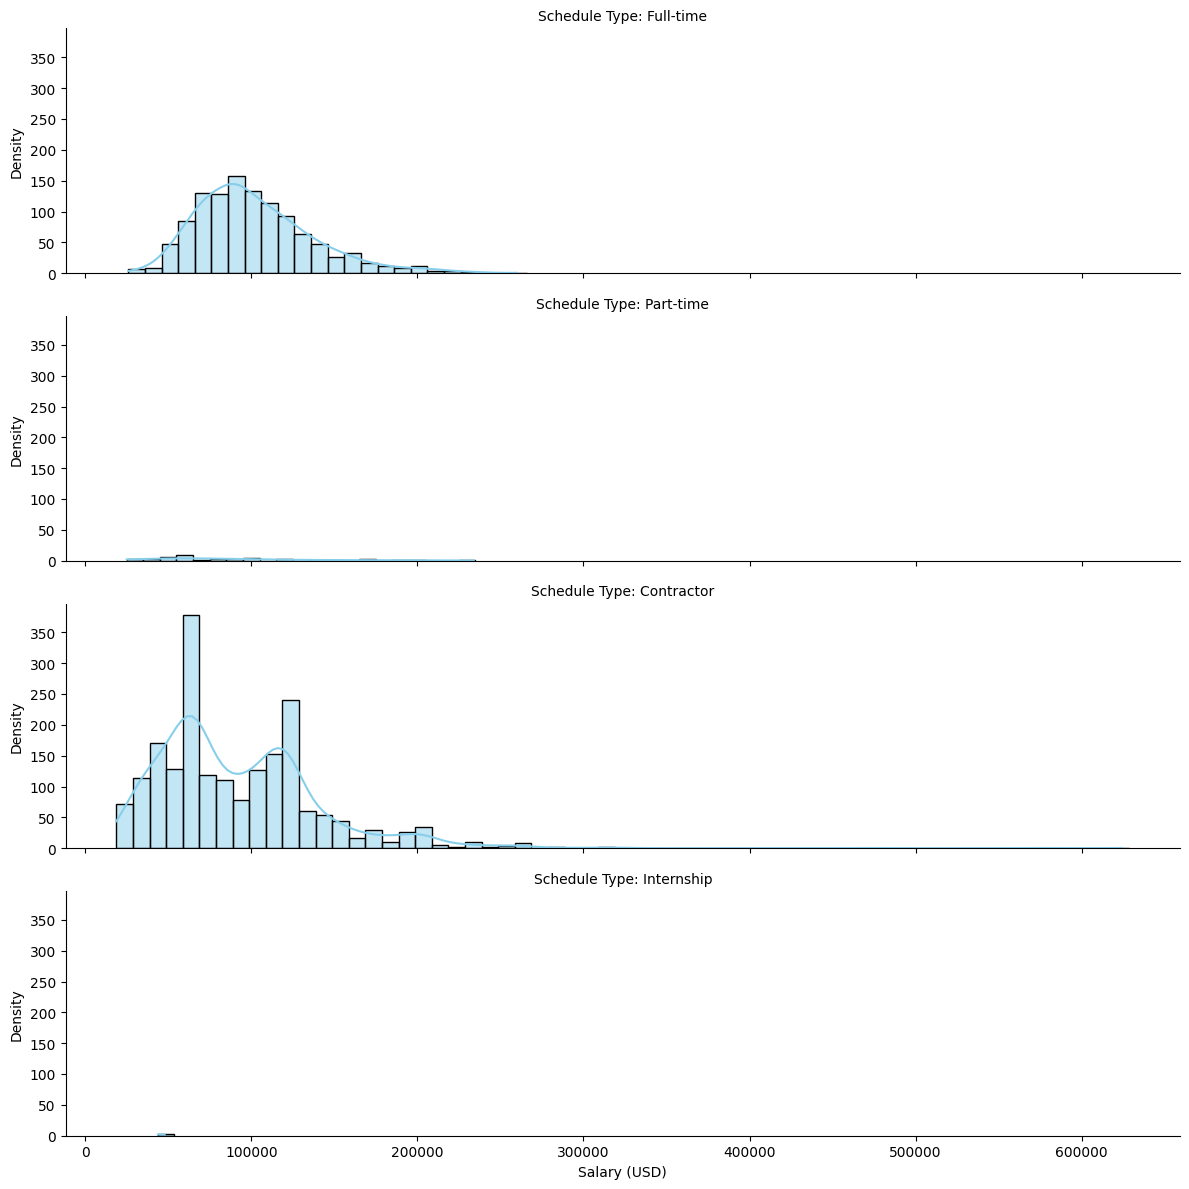

In [205]:
# Adjusting for better readability
g = sns.FacetGrid(df_pandas, row="schedule_type", height=3, aspect=4, row_order=['Full-time', 'Part-time', 'Contractor', 'Internship'])
g.map(sns.histplot, "salary_standardized", kde=True, color="skyblue", binwidth=10000)

g.set_axis_labels("Salary (USD)", "Density")
g.set_titles(row_template = 'Schedule Type: {row_name}')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


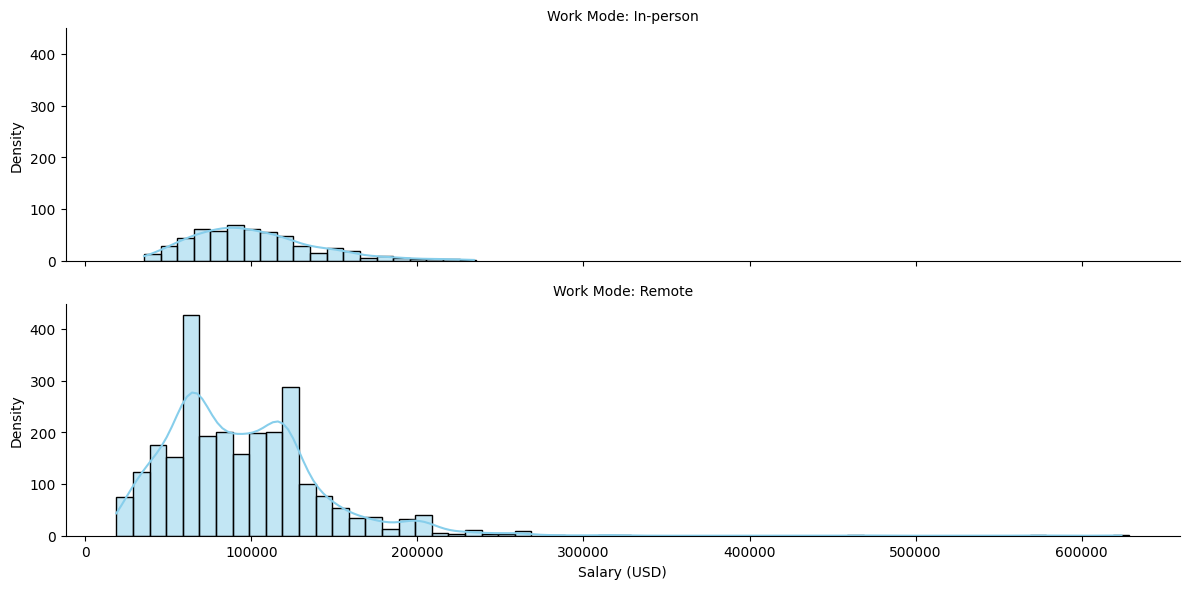

In [206]:
# Adjusting for better readability

# First, create a copy of your DataFrame to avoid modifying the original one
df_pandas_copy = df_pandas.copy()

# Replace 0 with 'In-person' and 1 with 'Remote'
df_pandas_copy['work_from_home'] = df_pandas_copy['work_from_home'].map({0: 'In-person', 1: 'Remote'})

# Then, create your FacetGrid
g = sns.FacetGrid(df_pandas_copy, row="work_from_home", height=3, aspect=4, row_order=['In-person', 'Remote'])
g.map(sns.histplot, "salary_standardized", kde=True, color="skyblue", binwidth=10000)

g.set_axis_labels("Salary (USD)", "Density")
g.set_titles(row_template = 'Work Mode: {row_name}')  # Adjusted the title to be relevant
plt.show()


## Data Preprocessing

### Features Selection

I will focus on the salaries for **Data Analyst**, **Senior Data Analyst**, and **Data Scientist**

In [207]:
df_pandas_1 = df_pandas[df_pandas['title'].isin(['Data Analyst', 'Senior Data Analyst', 'Data Scientist'])]

In [208]:
df_pandas_1['title'].value_counts()

title
Data Analyst           304
Senior Data Analyst     59
Data Scientist          33
Name: count, dtype: int64

In [209]:
df_pandas_1.columns

Index(['index', 'title', 'company_name', 'location', 'via', 'extensions',
       'job_id', 'posted_at', 'schedule_type', 'work_from_home', 'search_term',
       'date_time', 'search_location', 'salary_rate', 'salary_avg',
       'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly',
       'salary_standardized', 'description_tokens', 'work_type'],
      dtype='object')

In [210]:
# remove unnessary columns
df_pandas_1 = df_pandas_1.drop(['search_term', 'search_location', 'salary_rate', 'description_tokens', 'extensions','date_time', 'posted_at', 'job_id', 'via', 'location', 'company_name' ],axis=1)

In [211]:
# Reset Index
df_pandas_1 = df_pandas_1.reset_index(drop=True)

### Hot Encoding

In [212]:
newdf = df_pandas_1.copy()
newdf = pd.get_dummies(data=newdf, columns=['work_type', 'title', 'schedule_type'])

# Convert boolean columns to int (1 for True and 0 for False)
for column in newdf.columns:
    if newdf[column].dtype == 'bool':
        newdf[column] = newdf[column].astype(int)

# Replace spaces in column names with underscores
newdf.columns = newdf.columns.str.replace(' ', '_')
newdf.columns = newdf.columns.str.replace('-', '_')


newdf


,index,work_from_home,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,work_type_in_person,work_type_remote,title_Data_Analyst,title_Data_Scientist,title_Senior_Data_Analyst,schedule_type_Contractor,schedule_type_Full_time,schedule_type_Part_time
0,43,1.0,42.5,40.0,45.0,42.500000,88400.0,88400.0,0,1,1,0,0,0,1,0
1,48,0.0,33.0,32.0,34.0,33.000000,68640.0,68640.0,1,0,1,0,0,0,1,0
2,56,1.0,46.5,45.0,48.0,46.500000,96720.0,96720.0,0,1,1,0,0,1,0,0
3,168,0.0,70.0,65.0,75.0,70.000000,145600.0,145600.0,1,0,0,0,1,1,0,0
4,296,0.0,36.0,35.0,37.0,36.000000,74880.0,74880.0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1806,0.0,110000.0,70000.0,150000.0,52.884615,110000.0,110000.0,1,0,0,0,1,0,1,0
392,357,0.0,111500.0,80000.0,143000.0,53.605769,111500.0,111500.0,1,0,0,0,1,0,1,0
393,551,0.0,59307.5,47446.0,71169.0,28.513221,59307.5,59307.5,1,0,1,0,0,0,1,0
394,2059,0.0,44.0,40.0,48.0,44.000000,91520.0,91520.0,1,0,1,0,0,1,0,0


## Split the data

In [213]:
# split train test
from sklearn.model_selection import train_test_split

feature = newdf.drop(columns='salary_standardized')
target = newdf[['salary_standardized']]

#80:20
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
     

In [214]:
import statsmodels.formula.api as smf

# Define the formula for the model
formula = """
salary_standardized ~ title_Data_Analyst + 
title_Data_Scientist + title_Senior_Data_Analyst + 
work_type_remote + work_type_in_person + schedule_type_Contractor + 
schedule_type_Full_time + schedule_type_Part_time
"""

# Fit the model
model = smf.ols(formula=formula, data=newdf).fit()

# Print out the model summary statistics
print(model.summary())



                             OLS Regression Results                            
Dep. Variable:     salary_standardized   R-squared:                       0.124
Model:                             OLS   Adj. R-squared:                  0.111
Method:                  Least Squares   F-statistic:                     9.199
Date:                 Wed, 02 Aug 2023   Prob (F-statistic):           1.97e-09
Time:                         17:20:14   Log-Likelihood:                -4682.2
No. Observations:                  396   AIC:                             9378.
Df Residuals:                      389   BIC:                             9406.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

## Multicollinearity Study

In [215]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
# ensure only numeric columns/data are used
numeric_df = feature_train.select_dtypes(include=[np.number])

X = add_constant(numeric_df)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,index,1.027242
2,work_from_home,inf
3,salary_avg,inf
4,salary_min,inf
5,salary_max,inf
6,salary_hourly,inf
7,salary_yearly,inf
8,work_type_in_person,inf
9,work_type_remote,inf
10,title_Data_Analyst,inf


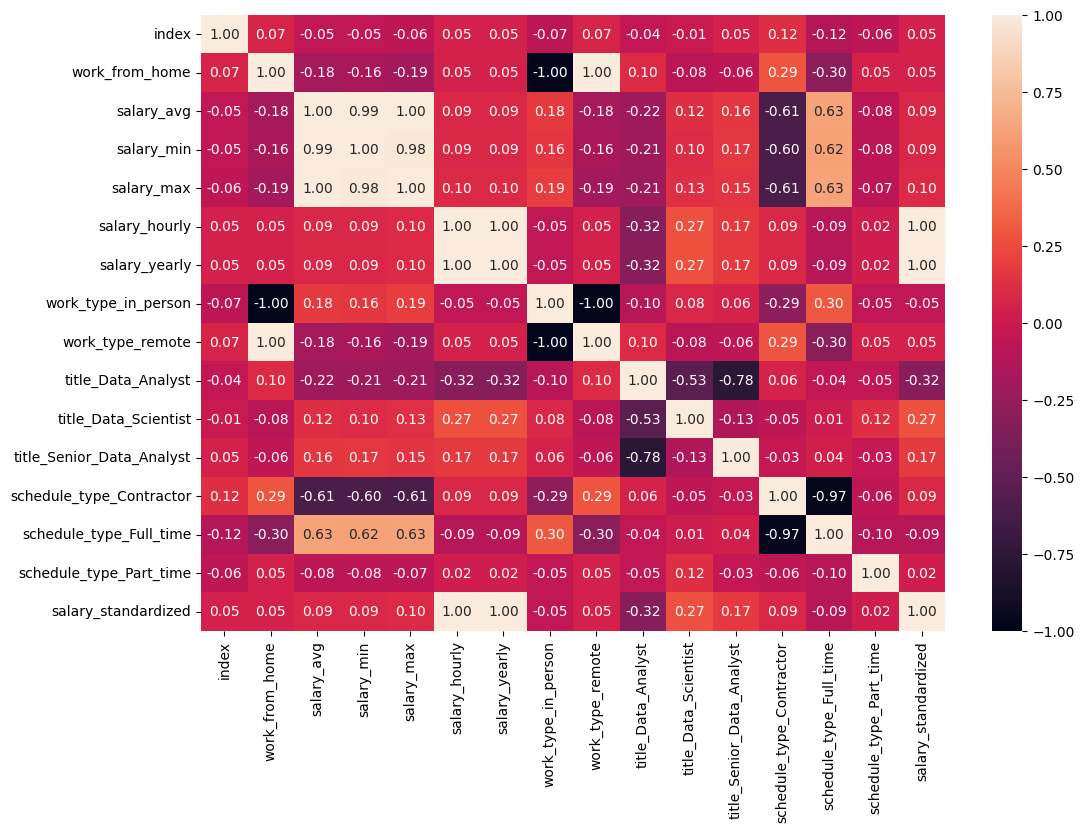

In [216]:
# Concatenate feature and target dataframes
train = pd.concat([feature_train, target_train], axis=1)

# Ensure only numeric columns/data are used
numeric_train = train.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_train.corr()

# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


## Modeling

### Linear Regression Model

In [217]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

feature_train = pd.get_dummies(feature_train)
# convert to numpy
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()

# train the model
multi_reg.fit(X_train, y_train)


LinearRegression()

In [218]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,1.038791e-04
1,index,-1.858926e-17
2,work_from_home,-2.077888e-04
3,salary_avg,-1.423361e-02
4,salary_min,7.116805e-03
5,salary_max,7.116805e-03
6,salary_hourly,4.804178e-04
7,salary_yearly,9.999998e-01
8,work_type_in_person,-1.038832e-04
9,work_type_remote,1.039056e-04


### Model Diagnostic

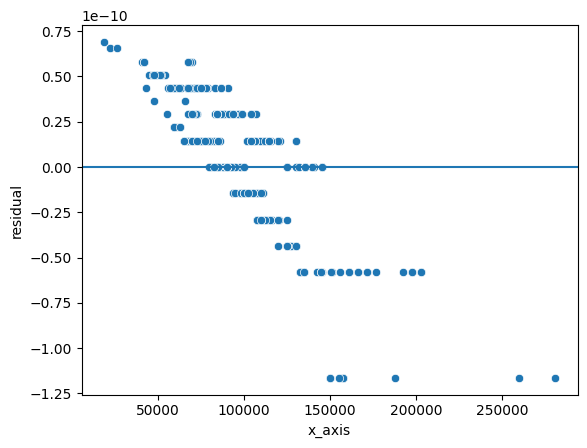

In [219]:
# calculate residuals
y_predict_train = multi_reg.predict(X_train)
residual = y_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

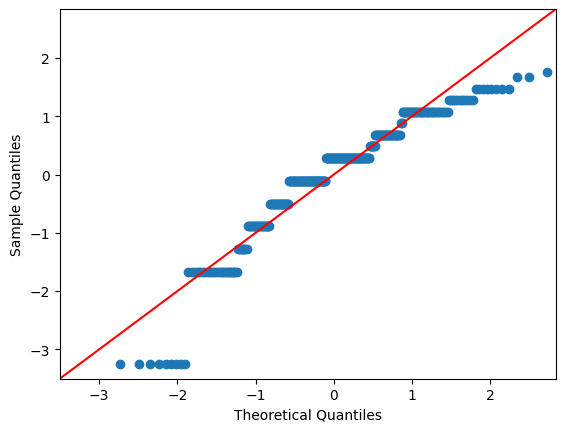

In [220]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Model Evaluation

#### Training Error

In [221]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))

R-squared for training data is 1.0
RMSE for training data is 3.71481972256315e-11


#### Testing Error

In [222]:
from sklearn.metrics import mean_squared_error

# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_predict_test = multi_reg.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))


RMSE for testing data is 3.7633743433430775e-11
